In [0]:
#https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe


In [0]:
df1.shape

(10000, 10)

In [0]:
#to upload files from local system
from google.colab import files
uploaded = files.upload()


Saving yelp.csv to yelp.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['yelp.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
# Code to read csv file into Colaboratory:


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 5.1MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [0]:
yelp = pd.read_csv('yelp.csv')

In [0]:
yelp.shape

(10000, 10)

In [0]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [0]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


Our data contains 10,000 reviews, with the following information for each one:  

business_id (ID of the business being reviewed)  
date (Day the review was posted)  
review_id (ID for the posted review)  
stars (1–5 rating for the business)  
text (Review text)  
type (Type of text)  
user_id (User’s id)  
{cool / useful / funny}   
(Comments on the review, given by other users)  

In [0]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [0]:
yelp['text length'] = yelp['text'].apply(len) # count of letters 
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


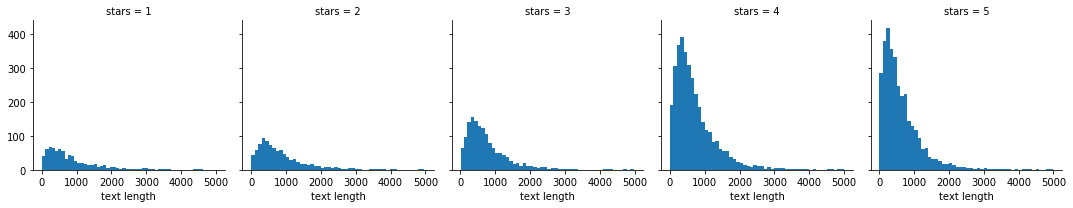

In [0]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.



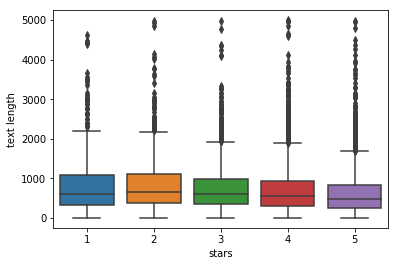

In [0]:
sns.boxplot(x='stars', y='text length', data=yelp)

From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.

Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr() method from Pandas to find any correlations in the dataframe.

In [0]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [0]:
stars = yelp.groupby('stars').mean()


In [0]:
stars.reset_index(inplace=True)

In [0]:
stars

,stars,cool,useful,funny,text length
0,1,0.576769,1.604806,1.056075,826.515354
1,2,0.719525,1.563107,0.875944,842.256742
2,3,0.788501,1.306639,0.694730,758.498289
3,4,0.954623,1.395916,0.670448,712.923142
4,5,0.944261,1.381780,0.608631,624.999101


In [0]:
stars.corr()

,stars,cool,useful,funny,text length
stars,1.000000,0.964758,-0.761288,-0.950389,-0.950171
cool,0.964758,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.761288,-0.743329,1.000000,0.894506,0.699881
funny,-0.950389,-0.944939,0.894506,1.000000,0.843461
text length,-0.950171,-0.857664,0.699881,0.843461,1.000000


funny is strongly correlated with useful, and useful seems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

## Our task is to predict if a review is either bad or good, so let’s just grab reviews that are either 1 or 5 stars from the yelp dataframe. We can store the resulting reviews in a new dataframe called yelp_class.

In [0]:
#
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape
Output: (4086, 11)

We can see from .shape that yelp_class only has 4086 reviews, compared to the 10,000 reviews in the original dataset. This is because we aren’t taking into account the reviews rated 2, 3, and 4 stars.

In [0]:
#Next, let’s create the X and y for our classification task. X will be the text column of yelp_class, and y will be the stars column.

In [0]:
X = yelp_class['text']
y = yelp_class['stars']

In [0]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

The classification algorithm will need some sort of feature vector in order to perform the classification task. The simplest way to convert a corpus to a vector format is the bag-of-words approach, where each unique word in a text will be represented by one number.

##  Method 1
First, let’s write a function that will split a message into its individual words, and return a list. We will also remove the very common words (such as “the”, “a”, “an”, etc.), also known as stopwords. To do this, we can take advantage of the NLTK library. The function below removes punctuation, stopwords, and returns a list of the remaining words, or tokens.

In [0]:
import string

In [0]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation] # this is letter by letter
    #print(nopunc)
    nopunc = ''.join(nopunc) #this is to form a string
    
    #print(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #nopunc.split() seperates the word by space

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#checking if the code works
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


## Vectorisation
At the moment, we have our reviews as lists of tokens (also known as lemmas). To enable Scikit-learn algorithms to work on our text, we need to convert each review into a vector.

We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.


In [0]:
from sklearn import feature_extraction as t
#bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [0]:
bow_transformer = t.text.CountVectorizer(analyzer=text_process).fit(X)

KeyboardInterrupt: ignored

In [0]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7fd154e49488>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [0]:
len(bow_transformer.vocabulary_) #size of the vocalbulary

26435

In [0]:
X.shape

(4086,)

In [0]:
#to know how this works
review_27= X[26]
review_27

"I love love LOVE this place. My boss (who is into healthy eating) recommended this place. I went over with some highly skeptical friends and one dinner was enough to convert them into believers! The food here is so good! We had the Shrimp dumplings and the Onion tart as starters. We ordered the Shirataki noodles and street tacos as entrees. So also ordered the Kale-aid. All of the dishes were yummy. \nI have gone back many times since then and have never been disappointed! I have gone after yoga to get some Kale salad or the chicken chopped salad. I always have to get the Kale aid. \nOnce, a guy at the next table, uprooted a whole plant by mistake (on the patio) and was highly embarrassed as was his date! Ever since, I have very careful not to throw my arms around as I can be quite clumsy sometimes! I do NOT want to be banned from my favorite place for my clumsiness! I don't think I can live without True Food!"

In [0]:
bow_27 = bow_transformer.transform([review_26])


<1x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [0]:
print(bow_27)

  (0, 448)	1
  (0, 5921)	1
  (0, 8596)	1
  (0, 9656)	1
  (0, 10228)	1
  (0, 10894)	1
  (0, 11936)	1
  (0, 15338)	1
  (0, 15446)	1
  (0, 16243)	1
  (0, 17930)	2
  (0, 18540)	1
  (0, 18978)	1
  (0, 22000)	1
  (0, 22343)	1
  (0, 22593)	1
  (0, 23598)	1
  (0, 23966)	1
  (0, 24748)	1
  (0, 25004)	2
  (0, 25026)	1
  (0, 25735)	1
  (0, 26235)	1


Implies there are 23 unques words in the review and 2 repeat twice

In [0]:
# now we know how this vectorization works

In [0]:
print(bow_transformer.get_feature_names()[11443])
print(bow_transformer.get_feature_names()[22077]) 

chicken
sandwich


In [0]:
X = bow_transformer.transform(X) # tranform it

In [0]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (4086, 26435)
Amount of Non-Zero occurrences:  222391


Implies there are 4086 words in the corpus (after removing punctuation and stop words) 

In [0]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print("Density: {}".format((density)))

Density: 0.2058920276658241


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101) # I startified the train test split

In [0]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
preds = nb.predict(X_test)

In [0]:
nb.score(X_test,y_test) #score(X, y[, sample_weight])

0.9176182707993474

In [0]:
from sklearn.metrics import confusion_matrix, classification_report


In [0]:
print(confusion_matrix(y_test, preds))

[[149  76]
 [ 25 976]]


In [0]:
print('\n', classification_report(y_test,preds))


               precision    recall  f1-score   support

           1       0.86      0.66      0.75       225
           5       0.93      0.98      0.95      1001

   micro avg       0.92      0.92      0.92      1226
   macro avg       0.89      0.82      0.85      1226
weighted avg       0.91      0.92      0.91      1226



model has acheived an accuracy of 91% but it is not accurte as the class labels are not balanced.

In [0]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [0]:
negative_review_transformed = bow_transformer.transform([negative_review])

In [0]:
nb.predict(negative_review_transformed)[0]

1

In [0]:
#But where does the model go wrong
another_negative_review = yelp_class['text'][140]
another_negative_review

"Other than the really great happy hour prices, its hit or miss with this place. More often a miss. :(\n\nThe food is less than average, the drinks NOT strong ( at least they are inexpensive) , but the service is truly hit or miss.\n\nI'll pass."

In [0]:
another_negative_review_transformed = bow_transformer.transform([another_negative_review])
nb.predict(another_negative_review_transformed)[0]

5

A clear blow... lets try to retrain using some other sampling technique ...
One explanation as to why this may be the case is that our initial dataset had a much higher number of 5-star reviews than 1-star reviews. This means that the model is more biased towards positive reviews compared to negative ones.